# Hierarchical Risk Parity (HRP)

## 1. Covariance and Correlation

For $N$ assets with return vector $\mathbf{r}$, the covariance matrix is:
$$
\Sigma \in \mathbb{R}^{N \times N}.
$$
The correlation matrix is defined as:
$$
\rho_{ij} = \frac{\Sigma_{ij}}{\sqrt{\Sigma_{ii} \Sigma_{jj}}}, \quad i,j=1,\ldots,N.
$$

## 2. Conversion from Correlation to Distance

Convert correlations to a distance metric:
$$
D_{ij} = \sqrt{\frac{1 - \rho_{ij}}{2}}, \quad i,j = 1,\ldots,N.
$$

## 3. Distance of Distances $\tilde{D}$

Let the distance profile of asset $i$ be:
$$
\mathbf{d}_i = (D_{i1}, D_{i2}, \dots, D_{iN}).
$$
The second-level distance is:
$$
\tilde{D}_{ij} = \|\mathbf{d}_i - \mathbf{d}_j\|_2 = \sqrt{\sum_{k=1}^N \bigl(D_{ik} - D_{jk}\bigr)^2}.
$$

## 4. Hierarchical Clustering

Use $\tilde{D}$ in a hierarchical clustering algorithm (e.g., Ward’s method) to generate a dendrogram and obtain an ordering $\pi$ that quasi-diagonalizes $\Sigma$.

## 5. Recursive Bisection for Weight Allocation

### Inverse-Variance Allocation

For a cluster $C$, assign preliminary weights:
$$
w_i \propto \frac{1}{\Sigma_{ii}}, \quad i \in C.
$$

### Splitting Clusters

Given two clusters $C_1$ and $C_2$ with aggregate variances:
$$
\sigma_{C}^2 = \mathbf{w}_C^\top \Sigma_C \mathbf{w}_C,
$$
assign weights as:
$$
\alpha_{C_1} = 1 - \frac{\sigma_{C_1}^2}{\sigma_{C_1}^2 + \sigma_{C_2}^2}, \quad \alpha_{C_2} = 1 - \frac{\sigma_{C_2}^2}{\sigma_{C_1}^2 + \sigma_{C_2}^2}.
$$
The allocation is applied recursively until each cluster reduces to a single asset; the final asset weight $w_i$ is the product of the splits along its dendrogram path.



In [1]:
import matplotlib.pyplot as plt



In [172]:
import yfinance as yf
import pandas as pd
import numpy as np
# Define the sectors and corresponding tickers. Adjust these lists as desired.
tickers = [
    "C", "CAT", "WFC", "BAC", "HON", "XOM", "JPM", "ADBE", "AAPL", "UPS",
    "NVDA", "BA", "SLB", "GS", "MS", "AMZN", "BMY", "LMT", "GOOGL", "PFE",
    "MRK", "GE", "UNH", "CVX", "ABT", "MSFT", "OXY"
]

# Set a time period for the historical price data.
# You can change the period to '6mo', '1y', '5y', etc., or specify start and end dates.
period = "20y"

all_stocks = yf.download(tickers, period=period)['Close']
print("Combined data sample:")
print(all_stocks.head())



/tmp/ipython-input-4115549243.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_stocks = yf.download(tickers, period=period)['Close']
[*********************100%***********************]  27 of 27 completed

Combined data sample:
Ticker          AAPL        ABT       ADBE    AMZN         BA        BAC  \
Date                                                                       
2005-10-31  1.728858  13.051347  32.250000  1.9930  45.817818  28.327145   
2005-11-01  1.726157  12.969498  32.799999  2.0185  46.108444  28.249426   
2005-11-02  1.799706  12.927050  32.869999  2.0375  45.860344  28.547329   
2005-11-03  1.856745  12.972521  32.680000  2.0780  46.427402  28.502010   
2005-11-04  1.835731  12.905828  32.450001  2.0545  46.271450  28.644478   

Ticker            BMY           C        CAT        CVX  ...         MS  \
Date                                                     ...              
2005-10-31   9.952632  293.736572  31.821671  26.563873  ...  29.593172   
2005-11-01   9.886812  291.298340  31.900333  26.829178  ...  28.842607   
2005-11-02   9.886812  292.260956  32.487259  27.238789  ...  28.924185   
2005-11-03   9.957333  294.463684  32.360188  27.685625  ...  28.67399

In [173]:


test_data = all_stocks[all_stocks.index >= '2023-10-01']
all_stocks = all_stocks[all_stocks.index < '2023-10-01']



In [174]:
all_stocks = all_stocks.pct_change().dropna()
test_data = test_data.pct_change().dropna()

In [175]:
all_stocks

Ticker,AAPL,ABT,ADBE,AMZN,BA,BAC,BMY,C,CAT,CVX,...,MS,MSFT,NVDA,OXY,PFE,SLB,UNH,UPS,WFC,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-01,-0.001563,-0.006271,0.017054,0.012795,0.006343,-0.002744,-0.006613,-0.008301,0.002472,0.009987,...,-0.025363,0.010117,-0.012218,0.008240,-0.008740,0.001432,0.019174,-0.001919,-0.005149,0.004632
2005-11-02,0.042609,-0.003273,0.002134,0.009413,-0.005381,0.010545,0.000000,0.003305,0.018399,0.015267,...,0.002828,0.019260,0.057936,-0.000503,0.002320,0.031243,0.009661,0.014835,0.004379,0.017376
2005-11-03,0.031693,0.003518,-0.005780,0.019877,0.012365,-0.001587,0.007133,0.007537,-0.003911,0.016404,...,-0.008650,-0.000756,-0.011695,0.016606,0.012501,0.009708,-0.031896,0.005143,-0.002180,0.020739
2005-11-04,-0.011318,-0.005141,-0.007038,-0.011309,-0.003359,0.004999,0.006610,0.003300,0.001309,-0.024714,...,-0.005880,0.008321,-0.017029,-0.024873,0.017832,-0.025884,0.006069,-0.002155,0.003698,-0.011439
2005-11-07,-0.015045,-0.000470,0.001233,0.007301,0.006281,0.005200,-0.000938,0.018202,0.013071,-0.010515,...,0.005914,0.013128,-0.004404,-0.023985,0.000449,0.006941,0.008272,0.009582,0.009545,-0.013817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.007380,-0.006928,-0.002535,0.016651,0.005412,-0.001447,0.004414,0.002444,0.004431,0.014614,...,-0.003122,0.001672,0.014708,0.004293,0.008871,0.013550,0.008259,0.003447,0.008004,0.011223
2023-09-26,-0.023398,-0.012722,-0.010360,-0.040299,-0.015796,-0.015580,-0.010480,-0.019503,-0.017319,-0.005394,...,-0.010358,-0.017006,-0.007366,-0.000158,-0.017586,-0.011865,-0.009465,-0.015618,-0.021896,0.001549
2023-09-27,-0.008898,-0.007274,-0.007308,0.000000,-0.000920,0.003680,-0.011103,0.005967,0.011836,0.019309,...,-0.006328,0.002082,0.013290,0.038796,-0.009259,0.028243,-0.003403,0.003358,0.005166,0.032557


In [176]:
cov, corr = all_stocks.cov(), all_stocks.corr()

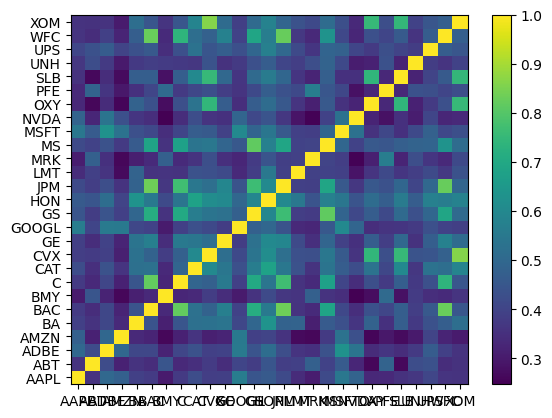

In [177]:
plt.figure()
plt.pcolor(corr)
plt.colorbar()
plt.yticks(np.arange(0.5, corr.shape[0] + 0.5), corr.columns)
plt.xticks(np.arange(0.5, corr.shape[0] + 0.5), corr.columns)


plt.show()

In [178]:
import numpy as np
import scipy.cluster.hierarchy as sch

def distance_corr(
        corr_matrix: np.ndarray
) -> np.ndarray:
    """
    Compute the distance matrix based on correlation.

    :param corr_matrix: Correlation matrix.
    :type corr_matrix: np.ndarray
    :return: Distance matrix based on correlation.
    :rtype: np.ndarray
    """
    distance_matrix = ((1 - corr_matrix) / 2.0) ** 0.5
    return distance_matrix



from sklearn.metrics import pairwise_distances

def distance_of_distances_df(corr_matrix: np.ndarray) -> pd.DataFrame:
    """
    Compute the 'distance of distances' matrix \tilde{D} from the distance DataFrame.
    The Euclidean distance is computed between the rows (or columns) of distance_df.

    :param distance_df: DataFrame containing the original distance matrix D.
    :return: DataFrame containing the second-level distance matrix \tilde{D},
             with index and columns matching those of distance_df.
    """
    # Compute the pairwise Euclidean distances using the underlying numpy array.
    distance_df = distance_corr(corr_matrix)
    d_values = pairwise_distances(distance_df.values, metric='euclidean')

    # Wrap the output back into a DataFrame
    d_tilde_df = pd.DataFrame(d_values, index=distance_df.index, columns=distance_df.index)
    return d_tilde_df



distance = distance_of_distances_df(corr)
link = sch.linkage(distance, 'single')

/tmp/ipython-input-2477081756.py:42: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(distance, 'single')


In [179]:
link

array([[ 9.        , 26.        ,  0.53927425,  2.        ],
       [ 5.        , 14.        ,  0.60208064,  2.        ],
       [25.        , 28.        ,  0.61309413,  3.        ],
       [12.        , 17.        ,  0.63724895,  2.        ],
       [ 7.        , 29.        ,  0.64318202,  4.        ],
       [20.        , 22.        ,  0.73855803,  2.        ],
       [27.        , 32.        ,  0.76134598,  4.        ],
       [30.        , 31.        ,  0.80789442,  6.        ],
       [ 8.        , 13.        ,  0.84420394,  2.        ],
       [ 2.        , 18.        ,  0.87547189,  2.        ],
       [11.        , 36.        ,  0.9114952 ,  3.        ],
       [ 0.        , 37.        ,  0.94806925,  4.        ],
       [16.        , 21.        ,  0.96047563,  2.        ],
       [ 4.        , 35.        ,  0.96688015,  3.        ],
       [10.        , 40.        ,  0.97000677,  4.        ],
       [19.        , 38.        ,  1.01031359,  5.        ],
       [ 6.        , 39.

In [180]:
def quasi_diagonal(linkage_matrix: np.ndarray) -> list:
    """
    Return a sorted list of original items to reshape the correlation matrix.

    :param linkage_matrix: Linkage matrix obtained from hierarchical clustering.
    :type linkage_matrix: np.ndarray
    :return: Sorted list of original items.
    :rtype: list
    """
    linkage_matrix = linkage_matrix.astype(int)
    sorted_items = pd.Series([linkage_matrix[-1, 0], linkage_matrix[-1, 1]])
    num_items = linkage_matrix[-1, 3]

    while sorted_items.max() >= num_items:
        print(sorted_items)
        sorted_items.index = range(0, sorted_items.shape[0] * 2, 2)
        dataframe = sorted_items[sorted_items >= num_items]
        print(dataframe)
        i = dataframe.index
        j = dataframe.values - num_items
        sorted_items[i] = linkage_matrix[j, 0]
        dataframe = pd.Series(linkage_matrix[j, 1], index=i + 1)

        sorted_items = sorted_items._append(dataframe)
        sorted_items = sorted_items.sort_index()
        sorted_items.index = range(sorted_items.shape[0])
        print(sorted_items)
    print(sorted_items)
    return sorted_items.tolist()

In [181]:
sortIx = quasi_diagonal(link)


0    34
1    51
dtype: int64
0    34
2    51
dtype: int64
0    30
1    31
2    47
3    50
dtype: int64
0    30
1    31
2    47
3    50
dtype: int64
0    30
2    31
4    47
6    50
dtype: int64
0    12
1    17
2     7
3    29
4    23
5    45
6    15
7    49
dtype: int64
0    12
1    17
2     7
3    29
4    23
5    45
6    15
7    49
dtype: int64
6     29
10    45
14    49
dtype: int64
0     12
1     17
2      7
3     25
4     28
5     23
6      1
7     43
8     15
9     44
10    48
dtype: int64
0     12
1     17
2      7
3     25
4     28
5     23
6      1
7     43
8     15
9     44
10    48
dtype: int64
8     28
14    43
18    44
20    48
dtype: int64
0     12
1     17
2      7
3     25
4      5
5     14
6     23
7      1
8      6
9     39
10    15
11     3
12    42
13    33
14    46
dtype: int64
0     12
1     17
2      7
3     25
4      5
5     14
6     23
7      1
8      6
9     39
10    15
11     3
12    42
13    33
14    46
dtype: int64
18    39
24    42
26    33
28    46
dtype: i

In [182]:
sortIx = corr.index[sortIx].tolist()  # recover labels
dataframe = corr.loc[sortIx, sortIx]

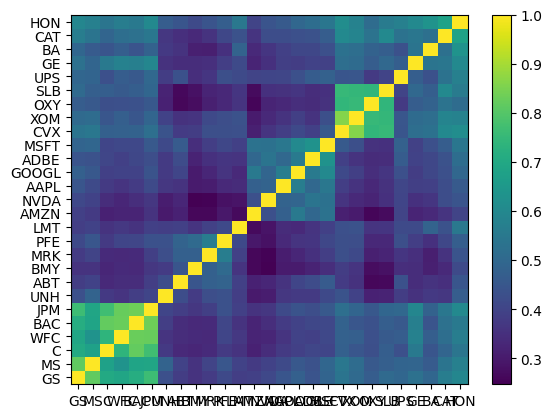

In [183]:
plt.figure()
plt.pcolor(dataframe)
plt.colorbar()
plt.yticks(np.arange(0.5, dataframe.shape[0] + 0.5), dataframe.columns)
plt.xticks(np.arange(0.5, dataframe.shape[0] + 0.5), dataframe.columns)


plt.show()

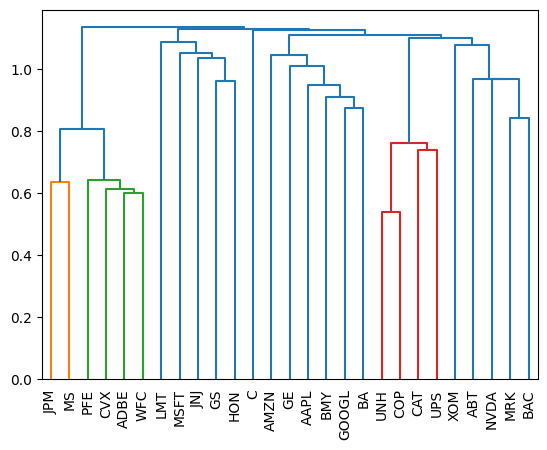

In [184]:
import matplotlib.pyplot as mpl
def llf(id):
    for i in range(30):
        if i == id:
            return all_values[i]


sch.dendrogram(link, leaf_label_func=llf, leaf_rotation=90)
mpl.show()

In [185]:
def inverse_variance_weights(covariance_matrix: pd.DataFrame) -> np.ndarray:
    """
    Compute the inverse-variance portfolio weights.

    :param covariance_matrix: Covariance matrix of asset returns.
    :type covariance_matrix: pd.DataFrame
    :return: Array of portfolio weights.
    :rtype: np.ndarray
    """
    inv_var_weights = 1.0 / np.diag(covariance_matrix)
    inv_var_weights /= inv_var_weights.sum()
    return inv_var_weights


def cluster_variance(covariance_matrix: pd.DataFrame, clustered_items: list) -> float:
    """
    Compute the variance of a cluster.

    :param covariance_matrix: Covariance matrix of asset returns.
    :type covariance_matrix: pd.DataFrame
    :param clustered_items: List of indices of assets in the cluster.
    :type clustered_items: list
    :return: Variance of the cluster.
    :rtype: float
    """
    cov_slice = covariance_matrix.loc[clustered_items, clustered_items]
    weights = inverse_variance_weights(cov_slice).reshape(-1, 1)
    cluster_variance = np.dot(np.dot(weights.T, cov_slice), weights)[0, 0]
    return cluster_variance

def recursive_bisection(covariance_matrix: pd.DataFrame, sorted_items: list) -> pd.Series:
    """
    Compute the Hierarchical Risk Parity (HRP) weights.

    :param covariance_matrix: Covariance matrix of asset returns.
    :type covariance_matrix: pd.DataFrame
    :param sorted_items: Sorted list of original items.
    :type sorted_items: list
    :return: DataFrame of asset weights.
    :rtype: pd.Series
    """
    weights = pd.Series(1, index=sorted_items)
    clustered_items = [sorted_items]

    while len(clustered_items) > 0:
        clustered_items = [
            i[j:k] for i in clustered_items for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1
        ]

        for i in range(0, len(clustered_items), 2):
            clustered_items_0 = clustered_items[i]

            clustered_items_1 = clustered_items[i + 1]

            cluster_variance_0 = cluster_variance(covariance_matrix, clustered_items_0)
            cluster_variance_1 = cluster_variance(covariance_matrix, clustered_items_1)
            alpha = 1 - cluster_variance_0 / (cluster_variance_0 + cluster_variance_1)
            weights[clustered_items_0] *= alpha
            weights[clustered_items_1] *= 1 - alpha

    return weights

In [186]:
weights = recursive_bisection(cov, sortIx)

/tmp/ipython-input-1155590256.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.55577798 0.55577798 0.55577798 0.55577798 0.55577798 0.55577798
 0.55577798 0.55577798 0.55577798 0.55577798 0.55577798 0.55577798
 0.55577798]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[clustered_items_0] *= alpha


In [187]:
weights

,0
GS,0.030860
MS,0.009714
C,0.009119
WFC,0.023691
BAC,0.009770
JPM,0.016029
UNH,0.060960
ABT,0.085107
BMY,0.070900
MRK,0.059526


In [188]:
import numpy as np
import pandas as pd

import cvxpy as cp

def min_variance_portfolio_long_only(cov_matrix: pd.DataFrame) -> pd.Series:
    """
    Computes the minimum-variance portfolio weights under long-only constraints
    (i.e., 0 <= w_i <= 1) for the given covariance matrix using quadratic programming.

    Parameters:
      cov_matrix (pd.DataFrame): Covariance matrix with asset names as index and columns.

    Returns:
      pd.Series: Minimum variance portfolio weights indexed by asset names.
    """
    n = cov_matrix.shape[0]
    Sigma = cov_matrix.values

    # Define the optimization variable, a vector of weights for n assets.
    w = cp.Variable(n)

    # Define the objective: minimize portfolio variance w^T Sigma w
    objective = cp.Minimize(cp.quad_form(w, Sigma))

    # Define constraints:
    # 1. Fully invested portfolio: sum(w) == 1
    # 2. No short selling: w >= 0 (weights must be non-negative)
    constraints = [cp.sum(w) == 1, w >= 0]

    # Set up and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Return the optimal weights as a pandas Series
    return pd.Series(w.value, index=cov_matrix.index, name='MinVarianceWeights')




# Compute the minimum variance portfolio
min_var_weights = min_variance_portfolio_long_only(cov)
print("Minimum Variance Portfolio Weights:")
print(min_var_weights)


Minimum Variance Portfolio Weights:
Ticker
AAPL     1.475780e-02
ABT      2.062617e-01
ADBE    -5.881177e-20
AMZN     1.718731e-19
BA      -1.946620e-19
BAC      4.696347e-19
BMY      1.436559e-01
C        4.479610e-19
CAT      2.621962e-19
CVX      4.837905e-19
GE       1.382291e-19
GOOGL    3.902636e-02
GS       3.206781e-19
HON     -3.812904e-20
JPM      3.383098e-19
LMT      2.093519e-01
MRK      9.197274e-02
MS       5.821073e-19
MSFT    -4.664204e-20
NVDA     1.379523e-19
OXY      8.525312e-19
PFE      1.049378e-01
SLB      7.689735e-19
UNH     -3.963226e-20
UPS      1.359255e-01
WFC      3.211489e-19
XOM      5.411035e-02
Name: MinVarianceWeights, dtype: float64


<Axes: >

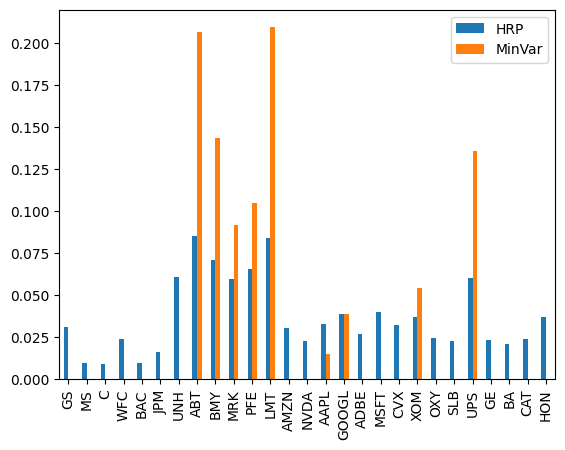

In [189]:
combine = pd.concat([weights, min_var_weights], axis=1)
combine.columns = ['HRP', 'MinVar']
combine.plot.bar()

In [190]:
returns = all_stocks @ weights
returns_min_var = all_stocks @ min_var_weights

In [191]:
np.mean(returns), np.mean(returns_min_var)

(np.float64(0.0006243183394688662), np.float64(0.0005317064510182882))

In [192]:
np.mean(returns) / np.std(returns), np.mean(returns_min_var) / np.std(returns_min_var)

(np.float64(0.050033453523617454), np.float64(0.049959244148191743))